# Лабораторная работа 1.2 Нелинейные фильтры

### Работу выполнил:<span style="color:blue"> Бояринце Дмитрий</span>

### Сделанную лабораторную работу отправляйте через [ФОРМУ](https://vyatsu-my.sharepoint.com/:f:/g/personal/usr09019_vyatsu_ru/Ep8q6AurefNIlDOa12RT5YwBtwdfbgDDo0pXpRQjJI3wpQ)

**Задание 1.1.** Реализуйте медианный фильтр.

In [1]:
import cv2
import numpy as np

In [2]:
img = cv2.imread('./lena.png')

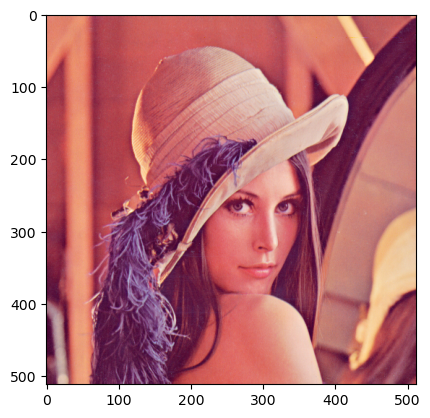

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(img[...,::-1])

In [4]:
img.shape

(512, 512, 3)

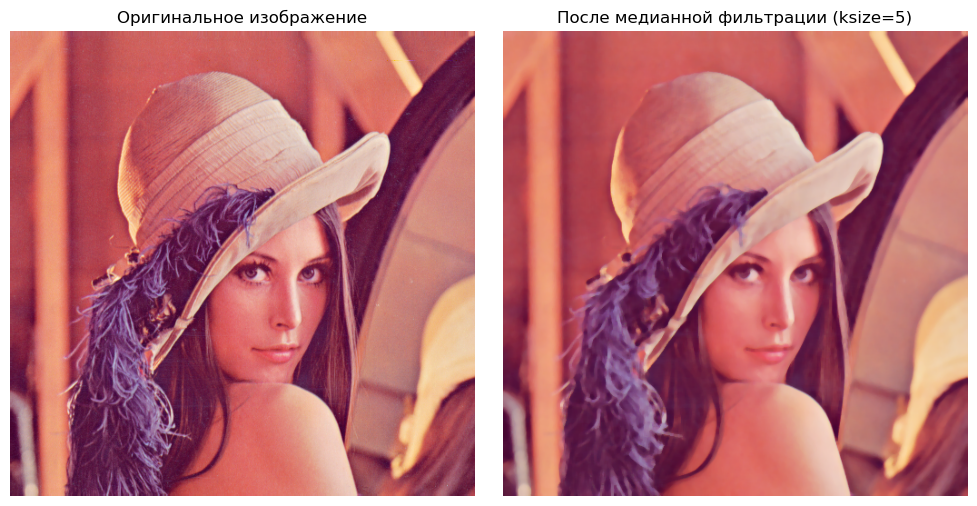

In [ ]:
# Реализация медианного фильтра
def median_filter(img, ksize):
    # if ksize % 2 == 0:
    #     raise ValueError("ksize должен быть нечётным числом")

    result = np.zeros_like(img)
    pad = ksize // 2
    padded_img = np.pad(img, ((pad, pad), (pad, pad), (0, 0)), mode='reflect')

    for channel in range(img.shape[-1]):
        for row in range(img.shape[0]):
            for col in range(img.shape[1]):
                window = padded_img[row:row + ksize, col:col + ksize, channel]
                result[row, col, channel] = np.median(window)

    return result

# Применяем медианный фильтр
filtered_img = median_filter(img, ksize=5)

# Отображаем оригинальное и отфильтрованное изображения рядом
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Оригинал
axes[0].imshow(img[..., ::-1])  # BGR -> RGB
axes[0].set_title("Оригинальное изображение")
axes[0].axis("off")

# После фильтрации
axes[1].imshow(filtered_img[..., ::-1])  # BGR -> RGB
axes[1].set_title("После медианной фильтрации (ksize=5)")
axes[1].axis("off")

# Красивое отображение
plt.tight_layout()
plt.show()

**Задание 1.2.** Добавьте случайный шум на изображение и протестируйте медианный фильтр на зашумленном изображении (код приведён).

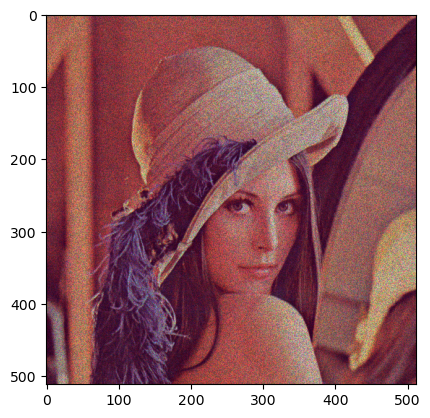

In [21]:
noisy_img = img.astype(float) + np.random.uniform(img.astype(float))
noisy_img = np.uint8(255. * np.abs(noisy_img) / np.max(np.abs(noisy_img)))
plt.imshow(noisy_img[...,::-1])

interactive(children=(IntSlider(value=5, description='ksize', max=20, min=1), Output()), _dom_classes=('widget…

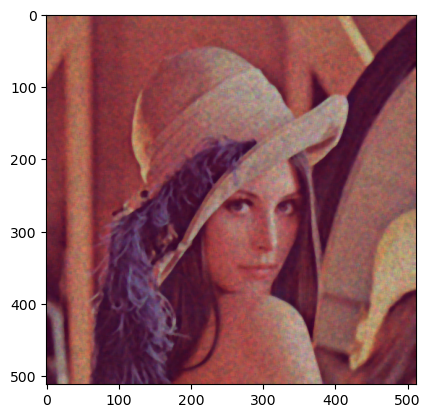

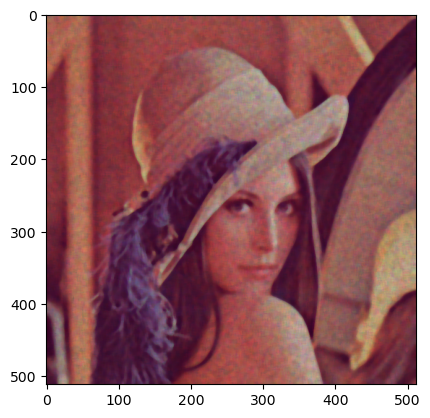

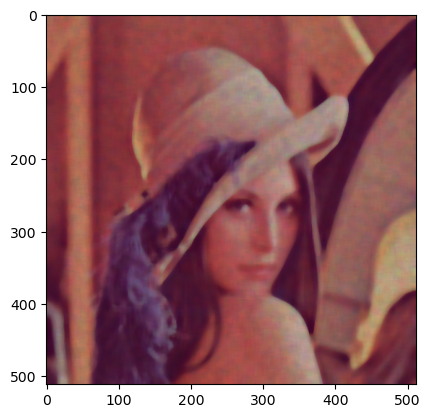

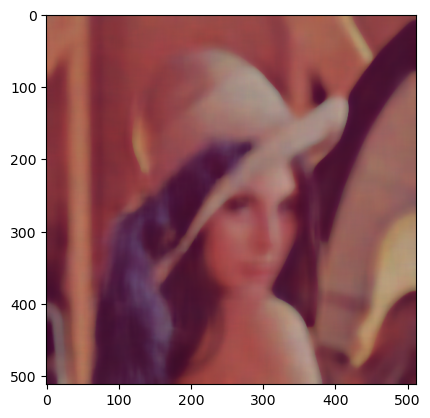

In [23]:
from ipywidgets import interact

def median_filter_show(ksize = 5):
    filtered = median_filter(noisy_img, ksize)
    return plt.imshow(filtered[...,::-1]);

interact(median_filter_show, ksize = (1, 20, 1));

**Задание 1.3.** Реализуйте билатеральный фильтр (см. лекции и https://users.soe.ucsc.edu/~manduchi/Papers/ICCV98.pdf). Протестируйте данный фильтр при различных значениях $\sigma_d$ и $\sigma_r$.